In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

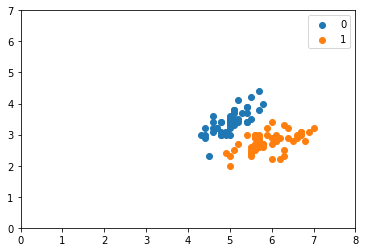

In [3]:
iris = load_iris()
data = iris.data
target = iris.target
X = data[:100, [0, 1, 2]]
y = target[:100]
label = np.array(y)
index_0 = np.where(label==0)
plt.scatter(X[index_0, 0], X[index_0, 1], label='0')
index_1 = np.where(label==1)
plt.scatter(X[index_1, 0], X[index_1, 1], label='1')
plt.xlim(0, 8)
plt.ylim(0, 7)
plt.legend()
plt.show()


# 逻辑回归模型的类

In [4]:
class Logistic(object):
    def __init__(self):
        self.W = None
    
    def train(self, X, y, learn_rate=0.001, iter_num=10200):
        train_num, train_feature = X.shape
        self.W = 0.001*np.ones((train_feature, 1))
        loss = []
        
        for i in range(iter_num):
            error, dW = self.compute_loss(X, y)
            self.W += -learn_rate*dW
            loss.append(error)
            if i % 500==0:
                print('i:%d error: %f' %(i, error))
        return loss
                    
    
    def compute_loss(self, X, y):
        train_num = X.shape[0]
        h = self.sigmoid(np.dot(X, self.W))
        loss = -np.sum((y*np.log(h) + (1-y)*np.log((1-h))))
        loss = loss/train_num
        dW = X.T.dot((h-y)) / train_num
        
        return loss, dW
        
    def sigmoid(self, X):
        return 1.0 / (1+np.exp(-X))
    
    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.W))
        pre = np.where(h>=0.5, 1, 0)
        return pre

# 可视化跟踪loss函数

In [8]:
X = data[:100, [0, 1, 2]]
y = target[:100].reshape((-1, 1))
clf = Logistic()
#loss = clf.train(X, y)
#plt.plot(loss)

In [9]:
y.shape

(100, 1)

In [6]:
clf.W

array([[-0.26997788],
       [-1.10635923],
       [ 1.76331413]])

In [7]:
clf.predict(X[0, 0])

array([[0],
       [0],
       [1]])

# 可视化决策边界

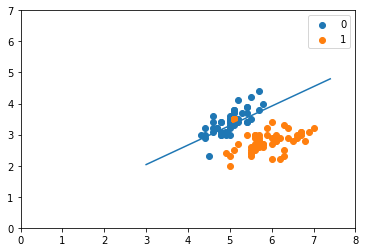

In [8]:
label = np.array(y)
index_0 = np.where(label==0)
plt.scatter(X[index_0, 0], X[index_0, 1], label='0')
index_1 = np.where(label==1)
plt.scatter(X[index_1, 0], X[index_1, 1], label='1')
plt.xlim(0, 8)
plt.ylim(0, 7)
# 决策边界
x1 = np.arange(3.0, 7.5, 0.1)
y1 = (-clf.W[0]-clf.W[1]*x1)/clf.W[2]
plt.plot(x1, y1)
plt.legend()

In [9]:
clf.W

array([[-0.26997788],
       [-1.10635923],
       [ 1.76331413]])

# 逻辑回归梯度上升算法

In [10]:
import numpy as np


def loadDataSet():
    from sklearn.datasets import load_iris
    iris = load_iris()
    data = iris.data
    label = iris.target
    return data[:100, [0,1, 2]], label[:100].reshape((-1, 1))

 
def standard(arr):
    '''
    数值标准化
    '''
    return (arr-arr.min())/(arr.max()-arr.min())


def sigmoid(inX):
    return 1.0/(1 + np.exp(-inX))

def predict(inMat, weights):
    inMatrix = np.mat(inMat)
    h = sigmoid((inMatrix*weights)/2500)
    pre = np.where(h>=0.5, 1, 0)
    return h

def gradientAscent(inMat, labelMat):
    inMatrix = np.mat(inMat)
    classLabels = np.mat(labelMat)
    m, n = inMatrix.shape
    alpha = 0.001
    iter_num = 1000
    loss = []
    weights = np.ones((n, 1))
    for i in range(iter_num):
        h = sigmoid(inMatrix * weights)
        error = classLabels - h
        loss.append(error)
        weights = weights + alpha*inMatrix.T*error
    return weights, loss

def stocGradientAscent(inMat, labelMat):
    '''
    随机梯度上升，当数据量比较大时，
    每次迭代都选择全量数据进行计算，
    计算量会非常大。
    所以采用每次迭代中一次,
    只选择其中的一行数据进行更新权重。
    '''
    inMatrix = np.mat(inMat)
    classLabels = np.mat(labelMat)
    m, n = inMatrix.shape
    alpha = 0.001
    iter_num = 1000
    loss = []
    weights = np.ones((n, 1))
    for k in range(iter_num):
        #  遍历计算每行
        for i in range(m):
            h = sigmoid(sum(inMatrix[i] * weights))
            error = classLabels[i] - h
            loss.append(error)
            weights = weights + alpha*inMatrix[i].T*error
    return weights, loss

def stocGradientAscent_1(inMat, labelMat):
    '''
    改进版随机梯度上升，
    在每次迭代中随机选择样本来更新权重，
    并且随迭代次数增加，权重变化越小。
    '''
    inMatrix = np.mat(inMat)
    classLabels = np.mat(labelMat)
    m, n = inMatrix.shape
    iter_num = 10200
    loss = []
    weights = np.ones((n, 1))
    for k in range(iter_num):
        dataIndex = [i for i in range(m)]
        for i in range(m):
            # 随迭代次数增加，权重变化越小
            alpha = 4 / (1+k+i) + 0.0001
            # 随机抽样
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(inMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            loss.append(error)
            weights = weights + alpha*inMatrix[randIndex].T*error
            # 取出已经抽取的样本
            del dataIndex[randIndex]
        return weights, loss

def plotBestFit(weights):  #画出最终分类的图
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,0])
            ycord1.append(dataArr[i,1])
        else:
            xcord2.append(dataArr[i,0])
            ycord2.append(dataArr[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s', label='1')
    ax.scatter(xcord2, ycord2, s=30, c='green', label='0')
    x = np.arange(3.0, 7.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(0, 8)
    plt.ylim(0, 7)
    plt.legend()
    plt.show()

def main():
    dataMat, labelMat = loadDataSet()
    weights, loss=gradientAscent(dataMat, labelMat)
    plotBestFit(np.array(weights))

#if __name__=='__main__':
   # main()

In [15]:
# w, l = gradientAscent(X, y)
w, l = gradientAscent(X, y)

In [16]:
w

matrix([[-0.79243949],
        [-1.85196254],
        [ 3.61390507]])

In [18]:
predict(np.mat([4.57, 8,6]), w)

matrix([[ 0.50032463]])

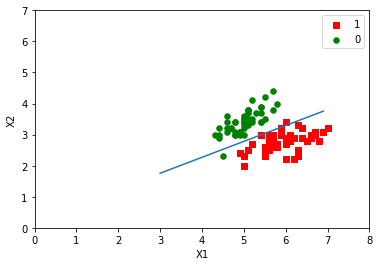

In [19]:
plotBestFit(np.array(w))

In [20]:
X, y = loadDataSet()
w, l = gradientAscent(X, y)
pre = predict(X, w)

# 图像识别

In [21]:
from PIL import Image
import numpy as np
import os
trainfold1 = '/sdcard/1/img_test/1'
trainfold2 = '/sdcard/1/img_test/1'

In [22]:
def im2arr(imgfile):
    im = Image.open(imgfile)
    im = im.resize((50, 50), Image.ANTIALIAS).convert('L')
    return np.array(im).astype('float')

In [28]:
def pickle(arr):
    li = []
    w, h  = arr.shape
    for i in range(w):
        for j in range(h):
            li.append(arr[i, j])
    return li
        


def standard(arr):
    temp = (arr - arr.min())/(arr.max() - arr.min())
    return temp

def grad(inMat, labelMat):
    inMatrix = np.mat(inMat)   
    classLabels = np.mat(labelMat)
    m, n = inMatrix.shape
    weights = np.ones((n, 1))
    alpha = 0.0001
    iter_num = 12000
    loss = []
    for i in range(iter_num):
        h = sigmoid((inMatrix*weights) / n)
        error = classLabels - h
        loss.append(error)
        if i%500 == 0:
            print(error)
        weights = weights + alpha*inMatrix.T*error
    return weights, loss

# 读取本地图片

In [24]:
X = []
y_1 = 0
y_2 = 0
for i in os.listdir(trainfold1):
    arr = im2arr(os.path.join(trainfold1, i))
    # 零值规范化
    arr = standard(arr)
    # 序列化
    li = pickle(arr)
    X.append(li)
    y_1 += 1
for j in os.listdir(trainfold2):
    arr2 = im2arr(os.path.join(trainfold2, j))
    arr2 = standard=(arr2)
    li2 = pickle(arr2)
    X.append(li2)
    y_2 += 1
    
# X,为训练数据，y为训练数据对应的标签
len(X)

58

In [25]:
y = []
for i in range(y_1):
    y.append(0)
for j in range(y_2):
    y.append(1)
len(y)

58

In [26]:
# 规整后转换为数组
X = np.array(X)
y = np.array(y).reshape((-1, 1))
len(li)

2500

# 梯度上升算法进行训练

In [35]:
# w, l= grad(X, y)

In [29]:
np.save('weights', w)
np.save('loss', l)

In [30]:
w

matrix([[ 0.18207882],
        [ 0.27539737],
        [ 0.03726741],
        ..., 
        [ 0.66757549],
        [ 0.61372918],
        [ 0.55597661]])

# 误差损失可视化

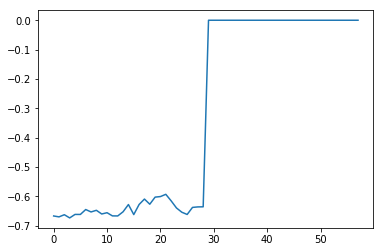

In [32]:
plt.plot(l[8])

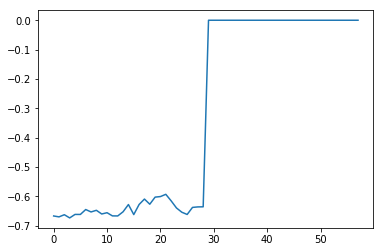

In [58]:
l[:][1]
plt.plot(l[8][:])

# 图像预测

In [33]:
for i in range(len(X)):
    print(predict(X[i], w))

[[ 0.50535318]]
[[ 0.50512775]]
[[ 0.5058025]]
[[ 0.50531026]]
[[ 0.50564424]]
[[ 0.50491016]]
[[ 0.50553931]]
[[ 0.50499517]]
[[ 0.50619229]]
[[ 0.50501618]]
[[ 0.50572701]]
[[ 0.50421118]]
[[ 0.50392154]]
[[ 0.50637317]]
[[ 0.50655195]]
[[ 0.50538553]]
[[ 0.50614115]]
[[ 0.5060005]]
[[ 0.50351074]]
[[ 0.50606462]]
[[ 0.5060115]]
[[ 0.50567907]]
[[ 0.50573964]]
[[ 0.50531522]]
[[ 0.50545781]]
[[ 0.50566335]]
[[ 0.50580844]]
[[ 0.50541184]]
[[ 0.5055762]]
[[ 0.99787904]]
[[ 0.99775817]]
[[ 0.99855359]]
[[ 0.99801315]]
[[ 0.99839903]]
[[ 0.99757761]]
[[ 0.99789082]]
[[ 0.99718736]]
[[ 0.99844757]]
[[ 0.99763882]]
[[ 0.99843606]]
[[ 0.99774061]]
[[ 0.99817316]]
[[ 0.99935024]]
[[ 0.99875001]]
[[ 0.9980506]]
[[ 0.99791575]]
[[ 0.99849974]]
[[ 0.99782922]]
[[ 0.99794663]]
[[ 0.99783253]]
[[ 0.99836949]]
[[ 0.99820466]]
[[ 0.99755204]]
[[ 0.99750382]]
[[ 0.99865541]]
[[ 0.99746846]]
[[ 0.99788685]]
[[ 0.99837741]]


In [34]:
predict(X[50], w)

matrix([[ 0.99836949]])

# 保存权重系数

In [782]:
np.save('weights')

# 获取权重

In [898]:
import numpy as np

fold = '/sdcard/1/img_target'
for i in os.listdir(fold):
    im_ = Image.open(os.path.join(fold, i))
    im_ = im_.resize((50, 50), Image.ANTIALIAS).convert('L')
    arr_ = np.array(im_).astype('float')
    arr_ = standard(arr_)
    li_ = pickle(arr_)
    X_ = np.array(li_)
    result = predict(X_, w)
    print(i, result)



    

IMG20181005211108.jpg [[ 0.50553931]]
IMG20181005211111.jpg [[ 0.50499517]]
IMG20181006092550.jpg [[ 0.50619229]]
IMG20181006093758.jpg [[ 0.50501618]]
IMG20181006093800.jpg [[ 0.50572701]]
IMG20181007193603.jpg [[ 0.50421118]]
IMG20181007193606.jpg [[ 0.50392154]]
IMG20181011132250.jpg [[ 0.50637317]]
IMG20181011151126.jpg [[ 0.50545781]]
IMG20181011151137.jpg [[ 0.50566335]]
IMG20181012165413.jpg [[ 0.5149156]]
IMG20181011193146.jpg [[ 0.51441251]]
IMG20181011201447.jpg [[ 0.51410698]]
IMG20181011201512.jpg [[ 0.51429784]]
Screenshot_2018-10-09-21-32-08-83.png [[ 0.51568003]]
Screenshot_2018-10-09-21-37-58-88.png [[ 0.51646055]]
text.png [[ 0.51603932]]
Screenshot_2018-10-09-03-06-19-19.png [[ 0.51700872]]


In [890]:
w

matrix([[ 0.18207882],
        [ 0.27539737],
        [ 0.03726741],
        ..., 
        [ 0.66757549],
        [ 0.61372918],
        [ 0.55597661]])

In [891]:
len(w)

2500